In [1]:
from scipy.stats import poisson
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
sns.set_context('talk')

### Chargaff's second party rule test

We will model the number of kmer occurences as a poisson random variable.

Lets say there are 3 billion bases in the human genome

In [2]:
n=3000000000
print(f'Number of samples = length of genome {n}')

k = 6
print(f"Length of kmer {k}")

number_of_kmers = 4**k
print(f"Total number of diverse kmers {number_of_kmers}")

probability_of_kmer=1/number_of_kmers
print(f"probability of kmer occurence {probability_of_kmer}")

expected_count = probability_of_kmer * n
print(f'expected number of kmers {expected_count}')

Number of samples = length of genome 3000000000
Length of kmer 6
Total number of diverse kmers 4096
probability of kmer occurence 0.000244140625
expected number of kmers 732421.875


## Empirical test

Sample from poisson distribution count of kmer and it's reverse compliment. Then subtract the two and check the percentage. Plot the distribution of percentages

In [3]:
diffs = []
for i in range(int(number_of_kmers/2)):
    first_kmer = np.random.poisson(732421)
    second_kmer = np.random.poisson(732421)
    # Second kmer isn't really independent of the first one 
    # since the presence of the sequences decreases the sample size due to 
    # having fewer sequences to choose from + overlap with the first set of
    # sequences

    # For the simplicity of the calculation I will however assume they are 
    # independent
    bigger_count = np.mean([first_kmer, second_kmer])
    percent_diff = np.abs(first_kmer - second_kmer)/ bigger_count
    diffs.append(percent_diff)

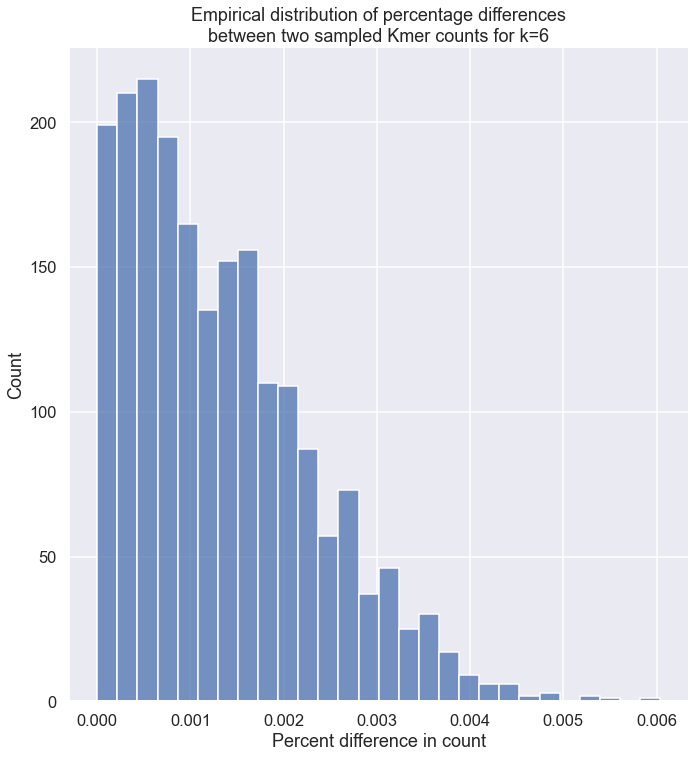

In [4]:
sns.displot(diffs,height=10)
plt.xlabel('Percent difference in count') 
plt.title('Empirical distribution of percentage differences\n\
between two sampled Kmer counts for k=6')
plt.savefig('./empirical_diff.png')

### Theoretical test

Subtract CDF of poisson RV at lower bound (expected value - 1%) from CDF of poisson RV at upper bound (expected value + 1%)

In [5]:
upper_k = expected_count + expected_count/100
lower_k = expected_count - expected_count/100
f"expected count +1% {upper_k}"
f"expected count -1% {lower_k}"
p_upper_k = poisson.cdf(mu=expected_count, k = upper_k)
p_lower_k = poisson.cdf(mu=expected_count, k = lower_k)

f"probability of observing a kmer count\
between upper bound: {int(upper_k)}\
and lower bound {int(lower_k)}\
 defined by 1 higher and lower of expected count%\
 {p_upper_k - p_lower_k} \
 under poisson distribution with lambda = {int(expected_count)}"

'probability of observing a kmer countbetween upper bound: 739746and lower bound 725097 defined by 1 higher and lower of expected count% 1.0  under poisson distribution with lambda = 732421'